## [Pandas](https://pandas.pydata.org) -- a Python package for tabular data

In [1]:
!pip show pandas

Name: pandas
Version: 1.2.4
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: c:\users\garashch\anaconda3\lib\site-packages
Requires: pytz, python-dateutil, numpy
Required-by: statsmodels, seaborn


In [2]:
import pandas as pd

In [3]:
print(dir(pd))

['BooleanDtype', 'Categorical', 'CategoricalDtype', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'DatetimeTZDtype', 'ExcelFile', 'ExcelWriter', 'Flags', 'Float32Dtype', 'Float64Dtype', 'Float64Index', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int16Dtype', 'Int32Dtype', 'Int64Dtype', 'Int64Index', 'Int8Dtype', 'Interval', 'IntervalDtype', 'IntervalIndex', 'MultiIndex', 'NA', 'NaT', 'NamedAgg', 'Period', 'PeriodDtype', 'PeriodIndex', 'RangeIndex', 'Series', 'SparseDtype', 'StringDtype', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'UInt16Dtype', 'UInt32Dtype', 'UInt64Dtype', 'UInt64Index', 'UInt8Dtype', '__builtins__', '__cached__', '__doc__', '__docformat__', '__file__', '__getattr__', '__git_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_config', '_hashtable', '_is_numpy_dev', '_lib', '_libs', '_np_version_under1p17', '_np_version_under1p18', '_testing', '_tslib', '_typing', '_version', 'api', 'array', 'arrays', 'bda

In [4]:
print([s for s in dir(pd) if s.startswith('read')])

['read_clipboard', 'read_csv', 'read_excel', 'read_feather', 'read_fwf', 'read_gbq', 'read_hdf', 'read_html', 'read_json', 'read_orc', 'read_parquet', 'read_pickle', 'read_sas', 'read_spss', 'read_sql', 'read_sql_query', 'read_sql_table', 'read_stata', 'read_table']


## 1. Pandas data structure
### 1.1 Series and Dataframe
Series is like an array or list, but in a tabulated form (i.e. a single column)

In [5]:
pd.Series

pandas.core.series.Series

In [6]:
pd.DataFrame

pandas.core.frame.DataFrame

In [7]:
# print(dir(pd.DataFrame))

### 1.2 Creating a DataFrame

In [8]:
d = {'Elements':['Hydrogen', 'Oxygen', 'Sulfur', 'Tungsten', 'Europium'],\
     'Z':[1,8,16,74,63],\
     'Weight':[1,16,32,184,152]}
df_elems = pd.DataFrame.from_dict(d)
df_elems

,Elements,Z,Weight
0,Hydrogen,1,1
1,Oxygen,8,16
2,Sulfur,16,32
3,Tungsten,74,184
4,Europium,63,152


In [9]:
df_elems[df_elems['Weight'] < 50]

,Elements,Z,Weight
0,Hydrogen,1,1
1,Oxygen,8,16
2,Sulfur,16,32


## 2. Data operations
### 2.1 [indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)
Use a more complete table of elements provided in the Lecture 1.

In [10]:
df = pd.read_table('.\\tableofelements.txt', sep='\t', index_col=1).reset_index().drop('index', 1)

In [11]:
df.head(3)

,No.,Atomic Weight,Name,Sym.,M.P.(°C),B.P.(°C),Density(g/cm3),Earth crust (%),Discovery(Year),Group,Electron configuration,Ionization energy (eV)
0,1,1.0079,Hydrogen,H,-259.0,-253.0,0.09,0.14,1776,1,1s1,13.5984
1,2,4.0026,Helium,He,-272.0,-269.0,0.18,NaN,1895,18,1s2,24.5874
2,3,6.9410,Lithium,Li,180.0,"1,347.00",0.53,NaN,1817,1,[He] 2s1,5.3917


In [12]:
df.columns.values

array(['No.', 'Atomic Weight', 'Name', 'Sym.', 'M.P.(°C)', ' B.P.(°C)',
       'Density(g/cm3)', 'Earth crust (%)', 'Discovery(Year)', 'Group',
       'Electron configuration', 'Ionization energy (eV)'], dtype=object)

In [13]:
df['Discovery(Year)'].values

array(['1776', '1895', '1817', '1797', '1808', 'ancient', '1772', '1774',
       '1886', '1898', '1807', '1755', '1825', '1824', '1669', 'ancient',
       '1774', '1894', '1807', '1808', '1879', '1791', '1830', '1797',
       '1774', 'ancient', '1735', '1751', 'ancient', 'ancient', '1875',
       '1886', 'ancient', '1817', '1826', '1898', '1861', '1790', '1794',
       '1789', '1801', '1781', '1937', '1844', '1803', '1803', 'ancient',
       '1817', '1863', 'ancient', 'ancient', '1783', '1811', '1898',
       '1860', '1808', '1839', '1803', '1885', '1885', '1945', '1879',
       '1901', '1880', '1843', '1886', '1867', '1842', '1879', '1878',
       '1907', '1923', '1802', '1783', '1925', '1803', '1803', '1735',
       'ancient', 'ancient', '1861', 'ancient', 'ancient', '1898', '1940',
       '1900', '1939', '1898', '1899', '1829', '1913', '1789', '1940',
       '1940', '1944', '1944', '1949', '1950', '1952', '1952', '1955',
       '1958', '1961', '1964', '1967', '1974', '1981', '1984',

In [14]:
df.loc[91, 'Name']

'Uranium'

In [15]:
df.loc[91, :]

No.                                     92
Atomic Weight                     238.0289
Name                               Uranium
Sym.                                     U
M.P.(°C)                          1,132.00
 B.P.(°C)                         3,818.00
Density(g/cm3)                       18.95
Earth crust (%)                        NaN
Discovery(Year)                       1789
Group                                  102
Electron configuration    [Rn] 5f3 6d1 7s2
Ionization energy (eV)              6.1941
Name: 91, dtype: object

In [16]:
df.iloc[91,2]

'Uranium'

### 2.2 tabular operation

In [17]:
dfrepl = df.replace('ancient', '1', inplace=False)

In [18]:
dfyr = dfrepl[['No.','Discovery(Year)']].apply(pd.to_numeric)
dfyr.head(3)

,No.,Discovery(Year)
0,1,1776
1,2,1895
2,3,1817


<AxesSubplot:xlabel='Discovery(Year)', ylabel='No.'>

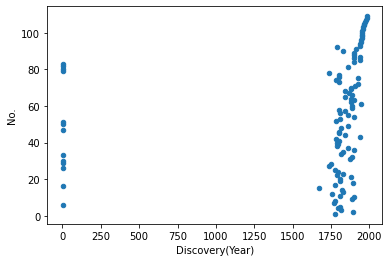

In [19]:
dfyr.plot.scatter(x='Discovery(Year)', y='No.')

(1600.0, 2010.0)

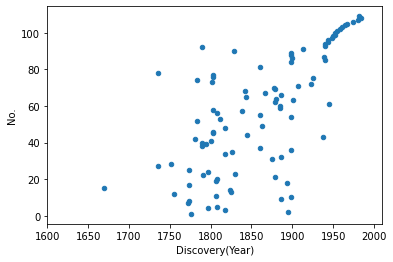

In [20]:
ax = dfyr.plot.scatter(x='Discovery(Year)', y='No.')
ax.set_xlim([1600, 2010])

### 2.3 method chaining

(1600.0, 2010.0)

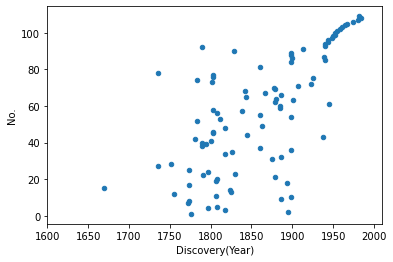

In [21]:
ax2 = df[df['Discovery(Year)'] != 'ancient'][['No.','Discovery(Year)']].apply(pd.to_numeric).\
     plot.scatter(x='Discovery(Year)', y='No.')
ax2.set_xlim([1600, 2010])

## 2. Pandas I/O
Read a .txt file of the table of elements taken from [here](https://www.science.co.il/elements/).

In [22]:
df = pd.read_table('.\\tableofelements.txt', sep='\t', index_col=1).reset_index().drop('index', 1)

In [23]:
df.head()

,No.,Atomic Weight,Name,Sym.,M.P.(°C),B.P.(°C),Density(g/cm3),Earth crust (%),Discovery(Year),Group,Electron configuration,Ionization energy (eV)
0,1,1.0079,Hydrogen,H,-259.0,-253.0,0.09,0.14,1776,1,1s1,13.5984
1,2,4.0026,Helium,He,-272.0,-269.0,0.18,NaN,1895,18,1s2,24.5874
2,3,6.9410,Lithium,Li,180.0,"1,347.00",0.53,NaN,1817,1,[He] 2s1,5.3917
3,4,9.0122,Beryllium,Be,"1,278.00","2,970.00",1.85,NaN,1797,2,[He] 2s2,9.3227
4,5,10.8110,Boron,B,"2,300.00","2,550.00",2.34,NaN,1808,13,[He] 2s2 2p1,8.2980


In [24]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [25]:
df.to_json('.\\tableofelements.json')

In [26]:
df.to_csv('.\\tableofelements.csv')

In [27]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.
